In [3]:
import gender_guesser.detector as gender
import pandas as pd

In [6]:
all_messages = pd.read_parquet('messages.parquet')
all_messages = all_messages[~all_messages['ContactName'].isna()]
all_messages.head()

,rowid,ThreadId,IsFromMe,FromPhoneNumber,ToPhoneNumber,Service,TextDate,MessageText,AttributedBody,RoomName,ContactName,AssociatedMessageType,GUID,AssociatedMessageGUID
0,1,+13147370530,1,Me,+13147370530,iMessage,2021-12-12 01:41:58,Emphasized “YOOOOO LETS GOOOO ”,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,None,Rhythm Garg,2004,3F41AE4F-2EC4-4C12-BFF7-E244634E025E,p:0/0F4F286F-C802-470F-AECE-9ED95B7A1C78
1,2,+13147370530,1,Me,+13147370530,iMessage,2021-12-12 01:42:18,Noooo bro if it gets home after u return to st...,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,None,Rhythm Garg,0,CE5945ED-AE95-417E-9402-D825B825D72D,None
2,3,+13147370530,1,Me,+13147370530,iMessage,2021-12-12 01:42:31,That’s really surprising actually bc mine came...,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,None,Rhythm Garg,0,FABE020C-D59E-464B-9FD3-47A9AB023582,None
3,4,+13147370530,1,Me,+13147370530,iMessage,2021-12-12 01:43:10,� I wanted to get 16 inch but since I just bou...,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,None,Rhythm Garg,0,5D183EDA-1ADA-4CFA-AD8D-BC9025414CDA,None
4,5,+13147370530,0,+13147370530,Me,iMessage,2021-12-12 10:50:59,� I called them and they said bc of how much I...,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,None,Rhythm Garg,0,503B1EC7-AB59-4D8B-87B3-917C948EBD65,None


In [13]:
detector = gender.Detector()

unique_contacts = all_messages['ContactName'].unique()
valid_contacts = [name for name in unique_contacts 
                 if not (str(name).startswith('+') or
                        '@' in str(name) or
                        str(name).isdigit())]

def get_gender(full_name):
    first_name = full_name.split()[0]
    gender_prediction = detector.get_gender(first_name)
    
    if gender_prediction in ['male', 'mostly_male']:
        return 'male'
    elif gender_prediction in ['female', 'mostly_female']:
        return 'female'
    else:
        return 'unknown'

gender_table = pd.DataFrame({
    'ContactName': valid_contacts,
    'gender': [get_gender(name) for name in valid_contacts]
})

gender_table.to_parquet('contact_genders.parquet')

# Display first few rows
print(gender_table.head())

      ContactName   gender
0     Rhythm Garg  unknown
1    Govind Chada     male
2         Aa Mom   unknown
3  Sina Mohammadi   female
4     Eshan Jolly  unknown


In [14]:
gender_table

,ContactName,gender
0,Rhythm Garg,unknown
1,Govind Chada,male
2,Aa Mom,unknown
3,Sina Mohammadi,female
4,Eshan Jolly,unknown
...,...,...
702,Mihir Patel,unknown
703,Mariell Abalos,unknown
704,Joanna Codeium,female
705,Aidan Chandra,male


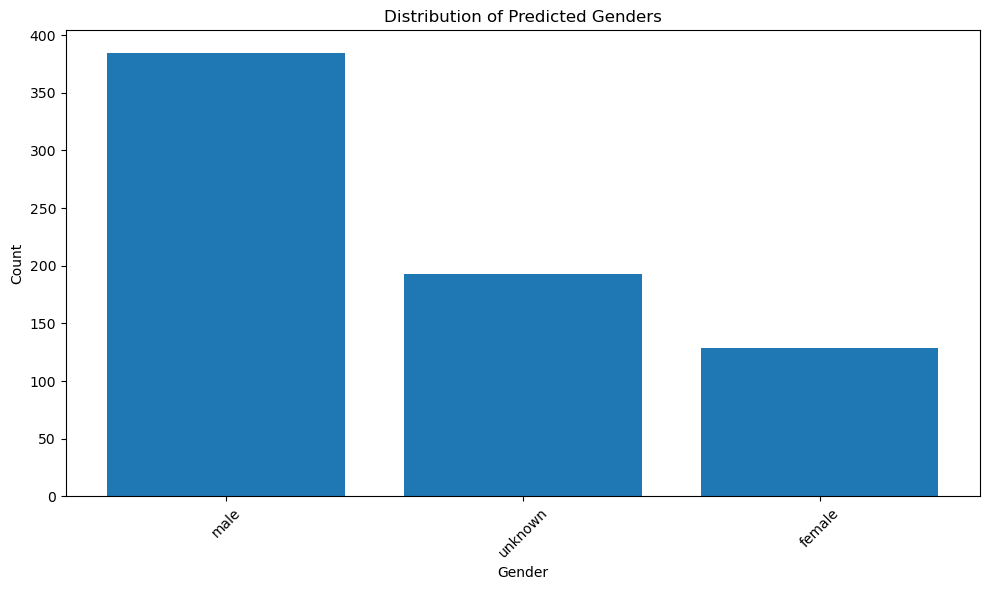

In [15]:
# Create a bar chart of gender distribution
gender_counts = gender_table['gender'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Distribution of Predicted Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
